In [ ]:
# !pip install imblearn --upgrade
# !pip install plotly --upgrade
# !pip install matplotlib
# !pip install seaborn
# !pip install pandas

In [18]:
import plotly
import seaborn as sns
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
sns.set(style="darkgrid")

In [2]:
data = pd.read_csv("equipment_failure_data_1.csv", header=0)

In [3]:
data.head()

,ID,DATE,REGION_CLUSTER,MAINTENANCE_VENDOR,MANUFACTURER,WELL_GROUP,S15,S17,S13,S5,S16,S19,S18,EQUIPMENT_FAILURE,S8,AGE_OF_EQUIPMENT
0,100001,12/2/14,G,O,Y,1,11.088000,145.223448,39.34,3501.0,8.426869,1.9,24.610345,0,0.0,880
1,100001,12/3/14,G,O,Y,1,8.877943,187.573214,39.20,3489.0,6.483714,1.9,24.671429,0,0.0,881
2,100001,12/4/14,G,O,Y,1,8.676444,148.363704,38.87,3459.0,6.159659,2.0,24.733333,0,0.0,882
3,100001,12/5/14,G,O,Y,1,9.988338,133.660000,39.47,3513.0,9.320308,2.0,24.773077,0,0.0,883
4,100001,12/6/14,G,O,Y,1,8.475264,197.181600,40.33,3589.0,8.022960,1.5,24.808000,0,0.0,884


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149855 entries, 0 to 149854
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  149855 non-null  int64  
 1   DATE                149855 non-null  object 
 2   REGION_CLUSTER      149855 non-null  object 
 3   MAINTENANCE_VENDOR  149855 non-null  object 
 4   MANUFACTURER        149855 non-null  object 
 5   WELL_GROUP          149855 non-null  int64  
 6   S15                 149855 non-null  float64
 7   S17                 149855 non-null  float64
 8   S13                 149855 non-null  float64
 9   S5                  149855 non-null  float64
 10  S16                 149855 non-null  float64
 11  S19                 149855 non-null  float64
 12  S18                 149855 non-null  float64
 13  EQUIPMENT_FAILURE   149855 non-null  int64  
 14  S8                  149855 non-null  float64
 15  AGE_OF_EQUIPMENT    149855 non-nul

In [10]:
data.describe()

,ID,WELL_GROUP,S15,S17,S13,S5,S16,S19,S18,EQUIPMENT_FAILURE,S8,AGE_OF_EQUIPMENT
count,149855.000000,149855.000000,149855.000000,149855.000000,149855.000000,149855.000000,149855.000000,149855.000000,149855.000000,149855.000000,149855.000000,149855.000000
mean,100320.419512,2.497561,14.185534,85.918460,35.643733,4557.518000,7.925408,8.229842,110.082879,0.001368,117.481750,2751.146341
std,178.503502,1.093775,8.665254,85.572229,14.723678,2497.993986,2.426462,13.041714,197.356230,0.036961,204.107481,3368.354905
min,100001.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-16.490000,0.000000
25%,100164.000000,2.000000,7.548000,0.000000,28.250000,3193.000000,6.596000,0.900000,11.300000,0.000000,8.660000,755.000000
50%,100328.000000,2.000000,11.077500,95.480000,35.020000,4224.000000,8.025600,4.200000,34.000000,0.000000,44.320000,1143.000000
75%,100472.000000,3.000000,22.080000,163.660000,41.940833,5615.000000,9.480700,10.500000,118.900000,0.000000,135.080000,3224.500000
max,100612.000000,4.000000,51.225600,478.470000,570.510000,52767.000000,23.533800,291.100000,3995.900000,1.000000,1824.960000,15170.000000


In [37]:
# check for missing data
data.isnull().sum(axis = 0)

ID                    0
DATE                  0
REGION_CLUSTER        0
MAINTENANCE_VENDOR    0
MANUFACTURER          0
WELL_GROUP            0
S15                   0
S17                   0
S13                   0
S5                    0
S16                   0
S19                   0
S18                   0
EQUIPMENT_FAILURE     0
S8                    0
AGE_OF_EQUIPMENT      0
dtype: int64

In [38]:
# check for duplicates 
len(data)-len(data.drop_duplicates())

0

In [32]:
# check for number failures
data['EQUIPMENT_FAILURE'].value_counts()

0    149650
1       205
Name: EQUIPMENT_FAILURE, dtype: int64

In [39]:
data['DATE'] = pd.to_datetime(data['DATE'])
data.head()

,ID,DATE,REGION_CLUSTER,MAINTENANCE_VENDOR,MANUFACTURER,WELL_GROUP,S15,S17,S13,S5,S16,S19,S18,EQUIPMENT_FAILURE,S8,AGE_OF_EQUIPMENT
0,100001,2014-12-02,G,O,Y,1,11.088000,145.223448,39.34,3501.0,8.426869,1.9,24.610345,0,0.0,880
1,100001,2014-12-03,G,O,Y,1,8.877943,187.573214,39.20,3489.0,6.483714,1.9,24.671429,0,0.0,881
2,100001,2014-12-04,G,O,Y,1,8.676444,148.363704,38.87,3459.0,6.159659,2.0,24.733333,0,0.0,882
3,100001,2014-12-05,G,O,Y,1,9.988338,133.660000,39.47,3513.0,9.320308,2.0,24.773077,0,0.0,883
4,100001,2014-12-06,G,O,Y,1,8.475264,197.181600,40.33,3589.0,8.022960,1.5,24.808000,0,0.0,884


In [25]:
# cosnider only cases where the equipment failed
data_failed = data[data['EQUIPMENT_FAILURE'] == 1]

In [29]:
data_failed.describe()

,ID,WELL_GROUP,S15,S17,S13,S5,S16,S19,S18,EQUIPMENT_FAILURE,S8,AGE_OF_EQUIPMENT
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.0,205.000000,205.000000
mean,100320.419512,2.497561,0.143523,0.984439,33.500696,4274.395461,7.357185,5.296195,178.530244,1.0,160.662903,2796.551220
std,178.939878,1.096449,1.325560,6.027393,16.347517,2169.870184,3.220491,8.652674,356.307541,0.0,235.334699,3259.394509
min,100001.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,120.000000
25%,100164.000000,2.000000,0.000000,0.000000,25.928621,2972.000000,6.076800,0.100000,11.700000,1.0,9.990000,904.000000
50%,100328.000000,2.000000,0.000000,0.000000,33.453333,4142.310345,7.727200,2.100000,56.600000,1.0,75.740000,1277.000000
75%,100472.000000,3.000000,0.000000,0.000000,41.067308,5408.000000,9.225000,6.400000,211.700000,1.0,221.491786,3313.000000
max,100612.000000,4.000000,18.456900,58.860000,153.950000,13519.347830,20.185200,50.750000,3995.900000,1.0,1461.304286,14537.000000


<AxesSubplot:xlabel='AGE_OF_EQUIPMENT', ylabel='Count'>

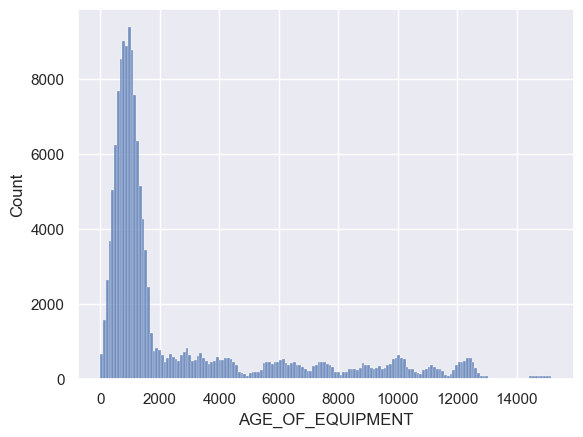

In [28]:
sns.histplot(data=data, x='AGE_OF_EQUIPMENT')

<AxesSubplot:xlabel='AGE_OF_EQUIPMENT', ylabel='Count'>

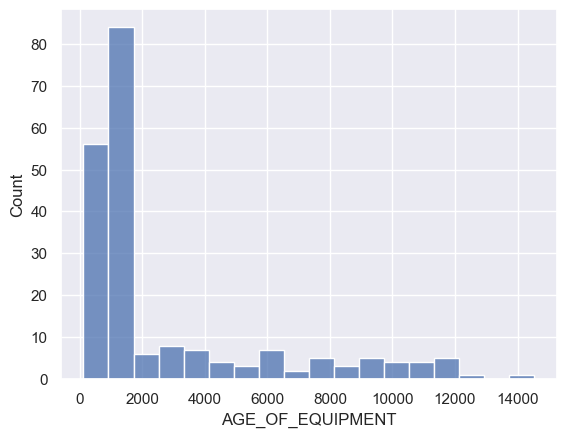

In [27]:
sns.histplot(data=data_failed, x='AGE_OF_EQUIPMENT')